## loading Data

In [7]:
import pandas as pd

# Load dataset
df = pd.read_csv("combined_data.csv", encoding="latin-1")

# Display first few rows
df.head()



,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


## Renaming Columns

In [8]:
# Rename columns for clarity
df = df[["label", "text"]]
df.columns = ["label", "message"]
df.head()



,label,message
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


## Train test model 


In [9]:
from sklearn.model_selection import train_test_split

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(df['message'], df['label'], test_size=0.2, random_state=42)

print("Training Data Size:", len(X_train))
print("Testing Data Size:", len(X_test))


Training Data Size: 66758
Testing Data Size: 16690


## converting String values into numerical values 

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text to numerical form
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


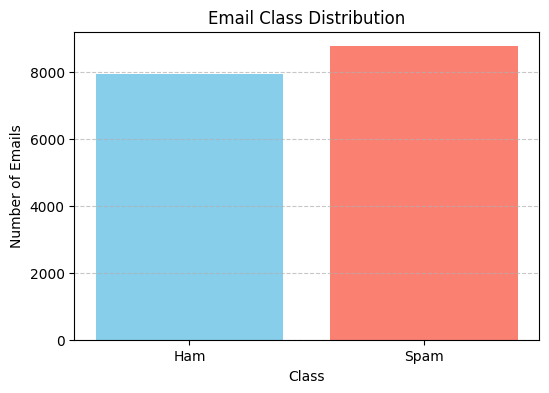

In [11]:
labels = ['Ham', 'Spam']
counts = [7938, 8752]

plt.figure(figsize=(6,4))
plt.bar(labels, counts, color=['skyblue', 'salmon'])
plt.title('Email Class Distribution')
plt.ylabel('Number of Emails')
plt.xlabel('Class')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


## Training Model

In [12]:
from sklearn.naive_bayes import MultinomialNB

# Train a Naive Bayes Model
model = MultinomialNB()
model.fit(X_train_vec, y_train)

print("Model Training Completed!")


Model Training Completed!


## evaluating 

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Make predictions
y_pred = model.predict(X_test_vec)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
report = classification_report(y_test, y_pred)
print("Classfication Report")

print(report)



Model Accuracy: 97.72%
Classfication Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      7938
           1       0.99      0.97      0.98      8752

    accuracy                           0.98     16690
   macro avg       0.98      0.98      0.98     16690
weighted avg       0.98      0.98      0.98     16690



## Save model

In [11]:
import pickle

# Save the trained model
with open("spam_model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

# Save the TF-IDF vectorizer
with open("vectorizer.pkl", "wb") as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)

print("Model and Vectorizer Saved Successfully!")


Model and Vectorizer Saved Successfully!
